In [13]:
from matplotlib import pyplot as plt
import pandas as pd
import scipy.stats as stats

In [14]:
#read xcel data sheets
dfK27 = pd.read_excel('onerowperGene_no_distfilt.xlsx',sheet_name='H3K27ac')

dfK27

,peak,chr,chromStart,chromEnd,Name,Start_b,End_b,gene,Strand,Distance,...,CV_mean,CV_pvalue,CV_qvalue,CV_fdr_BH,GF_amplitude,GF_phase,GF_mean,GF_pvalue,GF_qvalue,GF_fdr_BH
0,chr1_3513428_3517132,chr1,3513428,3517132,1,3671498,3673498,Xkr4,-,154367,...,53.464518,0.088330,0.003149,0.168916,21.543574,0.781804,80.302841,0.668752,0.541445,0.894427
1,chr1_4536336_4540298,chr1,4536336,4540298,2,4496413,4498413,Sox17,-,37924,...,99.701854,0.006307,0.000991,0.053160,40.330383,2.148969,127.469456,0.826515,0.541445,0.894427
2,chr1_4783354_4786691,chr1,4783354,4786691,6,4785726,4787726,Mrpl15,-,0,...,114.089159,0.093101,0.003229,0.173218,34.086610,2.050004,116.162149,0.819991,0.541445,0.894427
3,chr1_4806851_4810880,chr1,4806851,4810880,8,4805893,4807893,Lypla1,+,0,...,166.949631,0.021068,0.001695,0.090922,47.479721,1.579616,170.670270,0.780949,0.541445,0.894427
4,chr1_4856717_4859940,chr1,4856717,4859940,10,4855694,4857694,Tcea1,+,0,...,91.454961,0.014497,0.001438,0.077117,33.971186,1.696392,104.346860,0.792047,0.541445,0.894427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11471,chrY_80934115_80934793,chrY,80934115,80934793,18548,80757210,80759210,LOC100039574,-,174906,...,3.027548,0.150039,0.004159,0.223089,22.186115,12.816105,36.394316,0.675251,0.541445,0.894427
11472,chrY_82838522_82838927,chrY,82838522,82838927,18551,82249194,82251194,LOC380994,+,587329,...,5.153002,0.905292,0.016949,0.909246,13.883526,13.325029,41.229959,0.752785,0.541445,0.894427
11473,chrY_85252543_85253169,chrY,85252543,85253169,18555,85529519,85531519,LOC100040911,-,276351,...,5.103326,0.121082,0.003694,0.198189,21.815752,13.474818,54.946021,0.770058,0.541445,0.894427
11474,chrY_90783961_90784944,chrY,90783961,90784944,18565,90783442,90785442,Erdr1,+,0,...,72.865210,0.434337,0.008793,0.471686,24.722476,1.179909,73.188959,0.733899,0.541445,0.894427


In [15]:
uniq_hdac3 = pd.read_csv('../depGeneID_2_6_0.2_no_abs_FINAL/hdac3_uniq_ID.txt')['CycID'].tolist()
uniq_nfil3 = pd.read_csv('../depGeneID_2_6_0.2_no_abs_FINAL/nfil3_uniq_ID.txt')['CycID'].tolist()
uniq_nr1d1 = pd.read_csv('../depGeneID_2_6_0.2_no_abs_FINAL/nr1d1_uniq_ID.txt')['CycID'].tolist()

In [16]:
num_hdac3 = len(uniq_hdac3)
num_nfil3 = len(uniq_nfil3)
num_nr1d1 = len(uniq_nr1d1)
print(num_hdac3, num_nfil3, num_nr1d1)

600 373 800


In [17]:
dfk27signals = set(dfK27['gene'].tolist())
hdac3chip = set(uniq_hdac3) & dfk27signals
nfil3chip = set(uniq_nfil3) & dfk27signals
nr1d1chip = set(uniq_nr1d1) & dfk27signals
print(len(hdac3chip), len(nfil3chip), len(nr1d1chip))

434 259 594


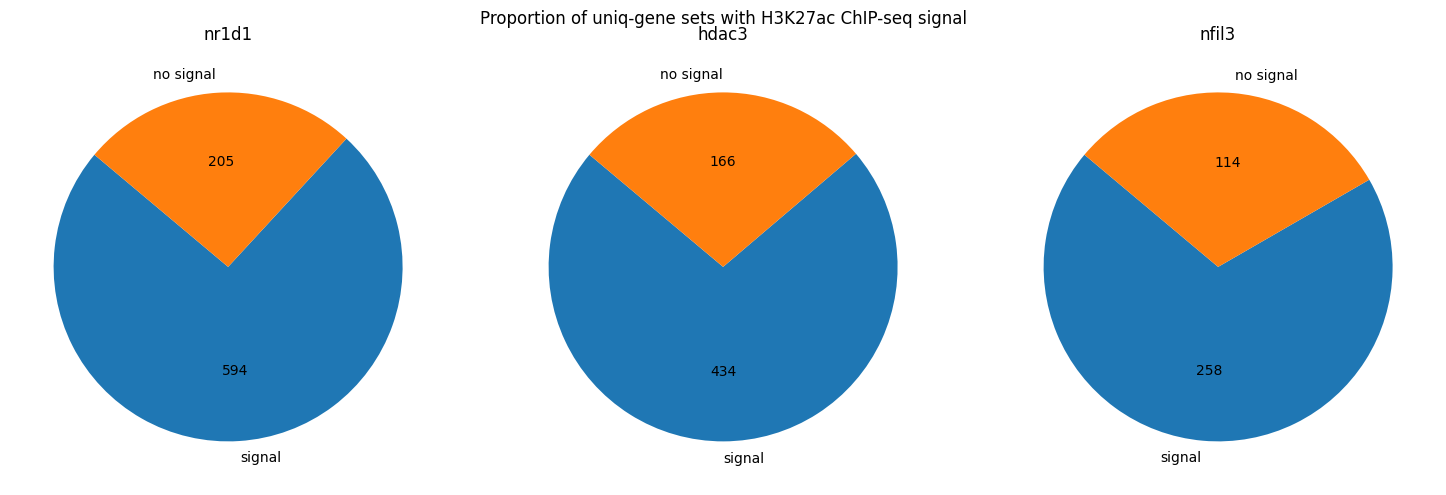

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Category': ['signal', 'no signal'],
    'nr1d1': [len(nr1d1chip), num_nr1d1 - len(nr1d1chip)],
    'hdac3': [len(hdac3chip), num_hdac3 - len(hdac3chip)],
    'nfil3': [len(nfil3chip), num_nfil3 - len(nfil3chip)],
}

df = pd.DataFrame(data).set_index('Category')

# Create subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Titles for each pie chart
titles = ['nr1d1', 'hdac3', 'nfil3']

# Generate each pie chart
for i, column in enumerate(df.columns):
    axes[i].pie(
        df[column], 
        labels=df.index, 
        autopct=lambda p: f'{int(p * sum(df[column]) / 100)}',  # Show count instead of percentage
        startangle=140
    )
    axes[i].set_title(titles[i])

# Adjust layout and show plot
fig.suptitle('Proportion of uniq-gene sets with H3K27ac ChIP-seq signal')
plt.tight_layout()
plt.show()

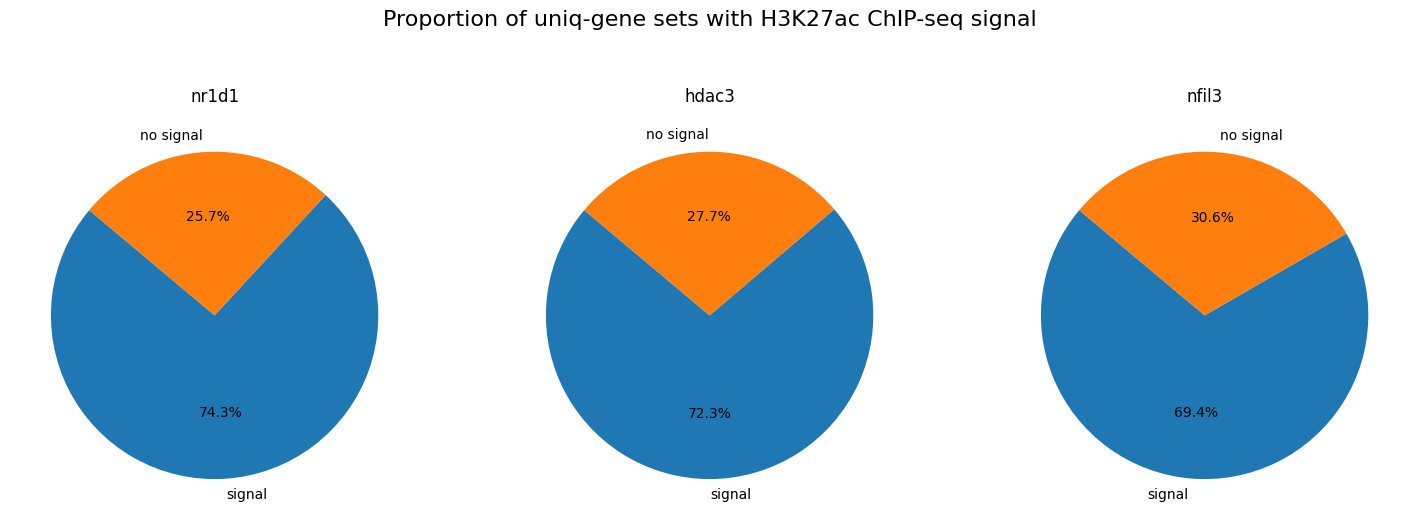

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'Category': ['signal', 'no signal'],
    'nr1d1': [len(nr1d1chip), num_nr1d1 - len(nr1d1chip)],
    'hdac3': [len(hdac3chip), num_hdac3 - len(hdac3chip)],
    'nfil3': [len(nfil3chip), num_nfil3 - len(nfil3chip)],
}

df = pd.DataFrame(data).set_index('Category')

# Create subplot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Widen figure for better layout

# Titles for each pie chart
titles = ['nr1d1', 'hdac3', 'nfil3']

# Generate each pie chart
for i, column in enumerate(df.columns):
    axes[i].pie(df[column], labels=df.index, autopct='%1.1f%%', startangle=140)
    axes[i].set_title(titles[i])

# Adjust the position of the main title
fig.suptitle('Proportion of uniq-gene sets with H3K27ac ChIP-seq signal', y=1.05, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout so subplots and suptitle fit better
plt.show()